# Chapter 12 Exercises

In [2]:
import datetime

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
plt.rcParams['figure.figsize'] = (10, 7)
plt.rcParams['axes.grid'] = False

In [4]:
tf.random.set_seed(42)
np.random.seed(42)

As an exercise, we will prepare some data for use in deep learning exercises in chapters 12 through 18. This data will be used to develop a deep learning model to forecast the air quality in Beijing at the Aotizhongxin station.
Specifically, for univariate modeling, we will ultimately predict the concentration
of nitrogen dioxide (NO2). For the multivariate problem, we will predict the concentration of nitrogen dioxide and temperature.

### The objective of this exercise is to prepare the data for deep learning. Follow these steps:
1. Read the data.
2. Plot the target.
3. Remove unnecessary columns.
4. Identify whether there is daily seasonality and encode the time accordingly.
5. Split your data into training, validation, and testing sets.
6. Scale the data using MinMaxScaler.
7. Save the train, validation, and test sets to be used later.

### Read the data

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/marcopeix/TimeSeriesForecastingInPython/refs/heads/master/data/beijing_air_quality.csv')
df.head()

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,16151,118.0,147.0,58.0,100.0,2000.0,2.0,-5.0,1021.0,-17.2,0.0,SW,0.7,Aotizhongxin,2015-01-02 22:00:00
1,16152,137.0,179.0,63.0,101.0,2100.0,2.0,-6.0,1018.0,-14.3,0.0,NNW,0.7,Aotizhongxin,2015-01-02 23:00:00
2,16153,141.0,215.0,59.0,100.0,2300.0,2.0,-7.0,1016.0,-15.9,0.0,SSE,0.4,Aotizhongxin,2015-01-03 00:00:00
3,16154,136.0,158.0,65.0,106.0,3000.0,2.0,-7.0,1016.0,-12.7,0.0,ESE,0.4,Aotizhongxin,2015-01-03 01:00:00
4,16155,132.0,163.0,56.0,107.0,3000.0,2.0,-6.0,1014.0,-16.9,0.0,NE,1.1,Aotizhongxin,2015-01-03 02:00:00


In [9]:
df.tail()

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
18909,35060,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin,2017-02-28 19:00:00
18910,35061,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin,2017-02-28 20:00:00
18911,35062,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin,2017-02-28 21:00:00
18912,35063,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin,2017-02-28 22:00:00
18913,35064,19.0,31.0,10.0,79.0,600.0,42.0,8.6,1014.1,-15.9,0.0,NNE,1.3,Aotizhongxin,2017-02-28 23:00:00


In [10]:
df.shape

(18914, 15)

### Plot target

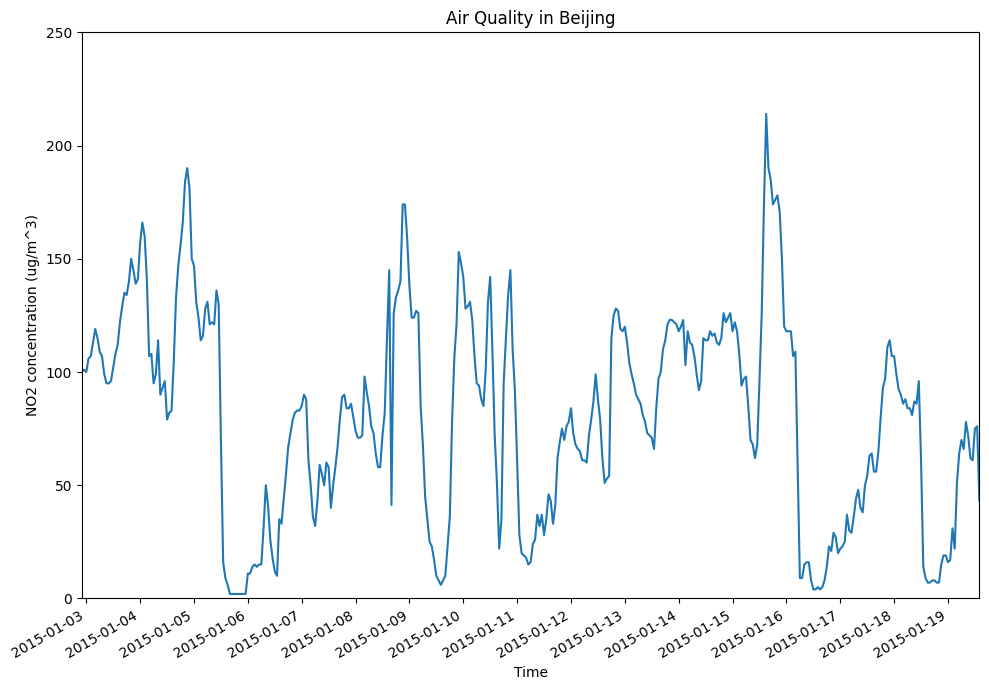

In [12]:
fig, ax = plt.subplots()

ax.plot(df['NO2'])
ax.set_xlabel('Time')
ax.set_ylabel('NO2 concentration (ug/m^3)')
ax.set_title("Air Quality in Beijing")

plt.xticks(np.arange(2, 400, 24), ['2015-01-03', '2015-01-04', '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08', 
                                   '2015-01-09', '2015-01-10', '2015-01-11', '2015-01-12', '2015-01-13', '2015-01-14', 
                                   '2015-01-15', '2015-01-16', '2015-01-17', '2015-01-18', '2015-01-19'])
plt.ylim(0, 250)
plt.xlim(0, 400)

fig.autofmt_xdate()
plt.tight_layout()

### Remove unnecessary columns

In [14]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
No,18914.0,25607.500000,5460.145831,16151.0,20879.250,25607.5,30335.75,35064.0
PM2.5,18914.0,79.407220,83.816615,3.0,19.000,54.0,107.00,898.0
PM10,18914.0,103.687485,95.725767,3.0,33.225,78.0,143.00,984.0
SO2,18914.0,13.201725,17.090182,2.0,2.000,7.0,16.00,341.0
NO2,18914.0,55.560272,37.834273,2.0,26.000,47.0,77.00,290.0
CO,18914.0,1324.737573,1351.213878,100.0,500.000,900.0,1600.00,10000.0
O3,18914.0,61.602319,58.980450,2.0,13.000,49.0,87.00,423.0
TEMP,18914.0,12.741331,11.751367,-16.8,2.000,13.0,23.10,38.8
PRES,18914.0,1013.480721,10.470266,987.5,1004.900,1013.2,1022.10,1042.0
DEWP,18914.0,1.399363,13.830859,-35.3,-10.100,1.3,14.00,27.3


In [15]:
df.head()

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,16151,118.0,147.0,58.0,100.0,2000.0,2.0,-5.0,1021.0,-17.2,0.0,SW,0.7,Aotizhongxin,2015-01-02 22:00:00
1,16152,137.0,179.0,63.0,101.0,2100.0,2.0,-6.0,1018.0,-14.3,0.0,NNW,0.7,Aotizhongxin,2015-01-02 23:00:00
2,16153,141.0,215.0,59.0,100.0,2300.0,2.0,-7.0,1016.0,-15.9,0.0,SSE,0.4,Aotizhongxin,2015-01-03 00:00:00
3,16154,136.0,158.0,65.0,106.0,3000.0,2.0,-7.0,1016.0,-12.7,0.0,ESE,0.4,Aotizhongxin,2015-01-03 01:00:00
4,16155,132.0,163.0,56.0,107.0,3000.0,2.0,-6.0,1014.0,-16.9,0.0,NE,1.1,Aotizhongxin,2015-01-03 02:00:00


In [16]:
df.shape

(18914, 15)

In [17]:
cols_to_drop = ['RAIN', 'wd', 'No', 'station']

df = df.drop(cols_to_drop, axis=1)

df.shape

(18914, 11)

### Identify whether there is daily seasonality and encode the time accordingly

In [19]:
df.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,WSPM,datetime
0,118.0,147.0,58.0,100.0,2000.0,2.0,-5.0,1021.0,-17.2,0.7,2015-01-02 22:00:00
1,137.0,179.0,63.0,101.0,2100.0,2.0,-6.0,1018.0,-14.3,0.7,2015-01-02 23:00:00
2,141.0,215.0,59.0,100.0,2300.0,2.0,-7.0,1016.0,-15.9,0.4,2015-01-03 00:00:00
3,136.0,158.0,65.0,106.0,3000.0,2.0,-7.0,1016.0,-12.7,0.4,2015-01-03 01:00:00
4,132.0,163.0,56.0,107.0,3000.0,2.0,-6.0,1014.0,-16.9,1.1,2015-01-03 02:00:00


In [20]:
# Convert the 'date_time' column to datetime objects and then map each to a Unix timestamp (seconds since 1970-01-01)
timestamp_s = pd.to_datetime(df.datetime).map(datetime.datetime.timestamp)

In [21]:
# Calculate the number of seconds in a day
day = 24 * 60 * 60

df['day_sin'] = (np.sin(timestamp_s * (2*np.pi/day))).values  # Application of the sine transformation. Notice that we use radians in the sine function
df['day_cos'] = (np.cos(timestamp_s * (2*np.pi/day))).values  # Apply the cosine transformation to the timestamp in seconds

In [22]:
df = df.drop(['datetime'], axis=1)

df.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,WSPM,day_sin,day_cos
0,118.0,147.0,58.0,100.0,2000.0,2.0,-5.0,1021.0,-17.2,0.7,0.707107,7.071068e-01
1,137.0,179.0,63.0,101.0,2100.0,2.0,-6.0,1018.0,-14.3,0.7,0.866025,5.000000e-01
2,141.0,215.0,59.0,100.0,2300.0,2.0,-7.0,1016.0,-15.9,0.4,0.965926,2.588190e-01
3,136.0,158.0,65.0,106.0,3000.0,2.0,-7.0,1016.0,-12.7,0.4,1.000000,7.285825e-12
4,132.0,163.0,56.0,107.0,3000.0,2.0,-6.0,1014.0,-16.9,1.1,0.965926,-2.588190e-01


### Split your data into training, validation, and testing sets

In [24]:
n = len(df)

# Split 70:20:10 (train:validation:test)
train_df = df[0:int(n*0.7)]         # 70%
val_df = df[int(n*0.7):int(n*0.9)]  # 20%
test_df = df[int(n*0.9):]           # 10%

train_df.shape, val_df.shape, test_df.shape

((13239, 12), (3783, 12), (1892, 12))

### Scale the data using MinMaxScaler

In [26]:
from sklearn.preprocessing import MinMaxScaler  

scaler = MinMaxScaler()  # Scales features to a given range (default: 0 to 1)

scaler.fit(train_df)     # Fit the scaler to the training data, calculating the minimum and maximum values for each column

train_df[train_df.columns] = scaler.transform(train_df[train_df.columns])  # Apply the scaling transformation to the training data
val_df[val_df.columns] = scaler.transform(val_df[val_df.columns])          # Apply the same scaling transformation to the validation data
test_df[test_df.columns] = scaler.transform(test_df[test_df.columns])      # Apply the same scaling transformation to the test data

### Save the train, validation, and test sets to be used later

In [28]:
train_df.to_csv('data/ex_train.csv', header=True, index=False)
val_df.to_csv('data/ex_val.csv', header=True, index=False)
test_df.to_csv('data/ex_test.csv', header=True, index=False)